In [34]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

input_file_path = "/home/dev/Desktop/keshav1.csv"

data = pd.read_csv(input_file_path,delimiter='\t')
print(data)

data.columns = ["Epoch", "vel"]
Epoch_data = np.array(data.Epoch)
VEL_data = np.array(data.vel)

                   Epoch         vel
0    2021-10-01 00:00:00  376.597426
1    2021-10-01 01:00:00  377.844237
2    2021-10-01 02:00:00  376.730661
3    2021-10-01 03:00:00  373.980403
4    2021-10-01 04:00:00  377.900998
..                   ...         ...
355  2021-10-15 19:00:00  308.732973
356  2021-10-15 20:00:00  307.907438
357  2021-10-15 21:00:00  314.791935
358  2021-10-15 22:00:00  326.378514
359  2021-10-15 23:00:00  338.124416

[360 rows x 2 columns]


In [85]:
data['Epoch'] = pd.to_datetime(data['Epoch'])

date_data = np.array(data.Epoch)
velocity_data = np.array(data.vel)



In [90]:
#This snippet was used to take only one of the 24 values given for each day, to reduce the cadence to - 1day

n = 24  # Change this value to choose the interval of rows you want to keep

input_file_path = "/home/dev/Desktop/keshav1.csv"
output_file_path = "/home/dev/Desktop/keshav1_Averaged.csv"

data = pd.read_csv(input_file_path,delimiter='\t')
print(data)

# # Read input file and write every nth row to output file
# with open(input_file_path, 'r', newline='') as infile, open(output_file_path, 'w', newline='') as outfile:
#     reader = csv.reader(infile)
#     writer = csv.writer(outfile)
    
#     # Write the header row to the output file
#     header = next(reader)
#     writer.writerow(header)
    
#     # Loop through the remaining rows, writing every nth row to the output file
#     for index, row in enumerate(reader, start=1):
#         if index % n == 0:
#             writer.writerow(row)

                   Epoch         vel
0    2021-10-01 00:00:00  376.597426
1    2021-10-01 01:00:00  377.844237
2    2021-10-01 02:00:00  376.730661
3    2021-10-01 03:00:00  373.980403
4    2021-10-01 04:00:00  377.900998
..                   ...         ...
355  2021-10-15 19:00:00  308.732973
356  2021-10-15 20:00:00  307.907438
357  2021-10-15 21:00:00  314.791935
358  2021-10-15 22:00:00  326.378514
359  2021-10-15 23:00:00  338.124416

[360 rows x 2 columns]


In [120]:
input_file_path = "/home/dev/Desktop/keshav1_Averaged.csv"

AVERAGED_FILE = pd.read_csv(input_file_path,delimiter='\t')
print(AVERAGED_FILE)

AVERAGED_FILE.columns = ["Epoch", "vel","MOM","err"]
Epoch_averaged= np.array(AVERAGED_FILE.Epoch)
VEL_averaged = np.array(AVERAGED_FILE.vel)
MOM=np.array(AVERAGED_FILE.MOM)
err = np.array(AVERAGED_FILE.err)

         Epoch         vel      MOM      err
0   2021-10-01  309.555577      NaN      NaN
1   2021-10-02  353.748284  430.575   86.115
2   2021-10-03  323.824307  282.075   56.415
3   2021-10-04  367.404889  316.600   63.320
4   2021-10-05  385.420246      NaN      NaN
5   2021-10-06  418.851659      NaN      NaN
6   2021-10-07  441.265641      NaN      NaN
7   2021-10-08  457.029420      NaN      NaN
8   2021-10-09  323.957180      NaN      NaN
9   2021-10-10  286.415002      NaN      NaN
10  2021-10-11  374.603686      NaN      NaN
11  2021-10-12  330.512360  473.825   94.765
12  2021-10-13  347.736315  532.100  106.420
13  2021-10-14  361.001364  651.500  130.300
14  2021-10-15  338.124416      NaN      NaN


<ErrorbarContainer object of 3 artists>

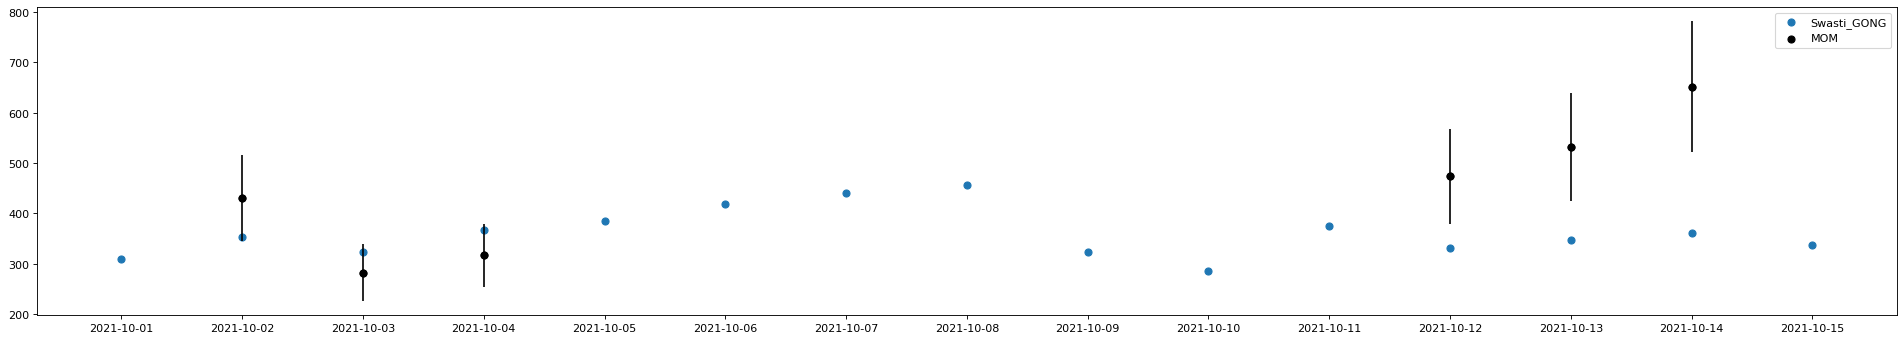

In [135]:

fig = plt.figure(figsize = (30,5),dpi =80)
pl = fig.add_subplot(1, 1, 1)

# rad_MOM_RS = (8.1,6.92,5.77,5.24,6.33,7.49)
# rad_MOM_AU = (0.0376682,0.03218077,0.0268328,0.024368,0.0294370387,0.034831504)
# date_MOM_AU = ('2021-10-02','2021-10-03','2021-10-04','2021-10-12', '2021-10-13', '2021-10-14')
# MOM = (172.2372178,112.83713799,126.64897552,189.53094138,212.84972353,260.6076649290)

plt.scatter(Epoch_averaged,VEL_averaged,s=40,label = "Swasti_GONG")
plt.scatter(Epoch_averaged,MOM,color = 'k',s=40,label = "MOM")
plt.legend()

pl.errorbar(Epoch_averaged,MOM, yerr=err,fmt='o',color = 'k',label = "MOM")